# Classification and Model Comparison


#### Objective:

* The objective is to apply machine learning models to classify the heart disease dataset, with a focus on implementing Logistic Regression from scratch and comparing it with k-Nearest Neighbors (KNN) and Support Vector Machines (SVM). 


In [1]:
# Importing necessary Libraries for reading data & Visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading heart dataset
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


##### Data description from [Kaggle](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

## 📋 Data Attributes Table & EDA

| Attribute Name | Description | Possible Values / Units |
| :--- | :--- | :--- |
| **age** | Patient's age | Years |
| **sex** | Patient's sex | Binary (e.g., 1=Male, 0=Female) |
| **cp** | Type of chest pain experienced | 4 distinct values (e.g., 1, 2, 3, 4) |
| **trestbps** | Resting systolic blood pressure | mm/Hg |
| **chol** | Serum cholesterol level | mg/dl |
| **fbs** | Fasting blood sugar level | Binary: 1 if $> 120$ mg/dl, 0 otherwise |
| **restecg** | Resting electrocardiographic results | 0, 1, or 2 resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] |
| **thalach** | Maximum heart rate achieved during the exercise test | Beats per minute (BPM) |
| **exang** | Exercise Angina induced by exercise | Binary (e.g., 1=Yes, 0=No) |
| **oldpeak** | ST depression induced by exercise relative to rest | Numeric value |
| **slope** | Slope of the peak exercise ST segment | Numeric values (e.g., 1, 2, 3) [Up: upsloping, Flat: flat, Down: downsloping] |
| **ca** | Number of major vessels (0-3) colored by flourosopy | 0, 1, 2, or 3 |
| **thal** | Thallium stress test result | 0 = normal; 1 = fixed defect; 2 = reversable defect |
| **target** | Target column | 0 = no heart disease ; 1 = has heart disease |




In [4]:
# Getting Basic Statistics
# Initial Data Inspection
print("--- Dataset Info ---")
print(df.info())
print("\n--- Summary Statistics ---")
display(df.describe())
print("\n--- Missing Values ---")
print(df.isnull().sum().any())

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

--- Summary Statistics ---


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000



--- Missing Values ---
False


In [56]:
#Getting shape of the Dataset
df.shape

(303, 14)

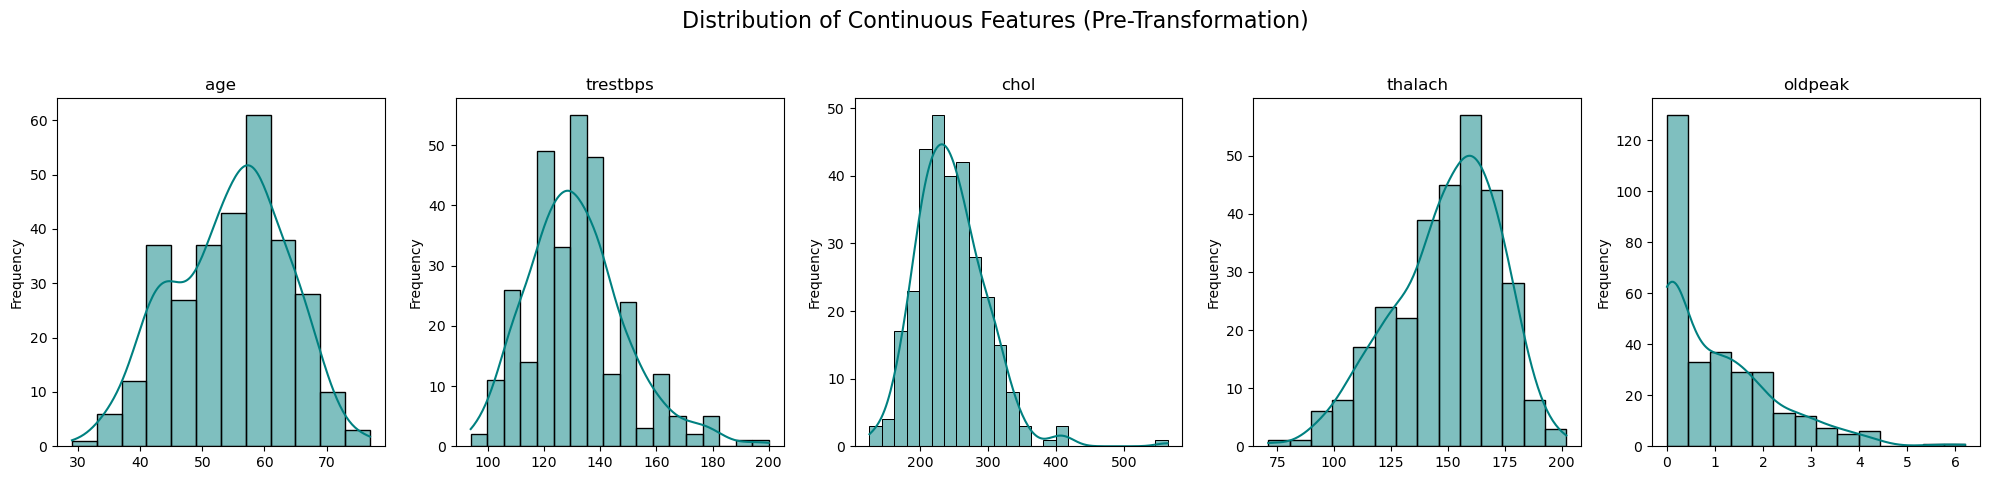

In [78]:
#Visualizing continuous variables in Histograms
cont_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Setting up the figure and axes
# We create a grid with 1 row and 5 columns for a side-by-side comparison
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))
fig.suptitle('Distribution of Continuous Features (Pre-Transformation)', fontsize=16)

for i, col in enumerate(cont_features):
    sns.histplot(df[col], kde=True, ax=axes[i], color='teal')
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

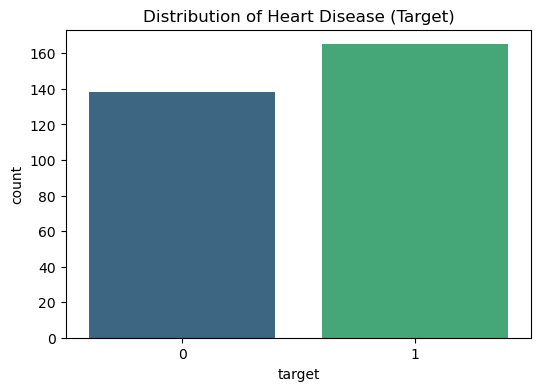

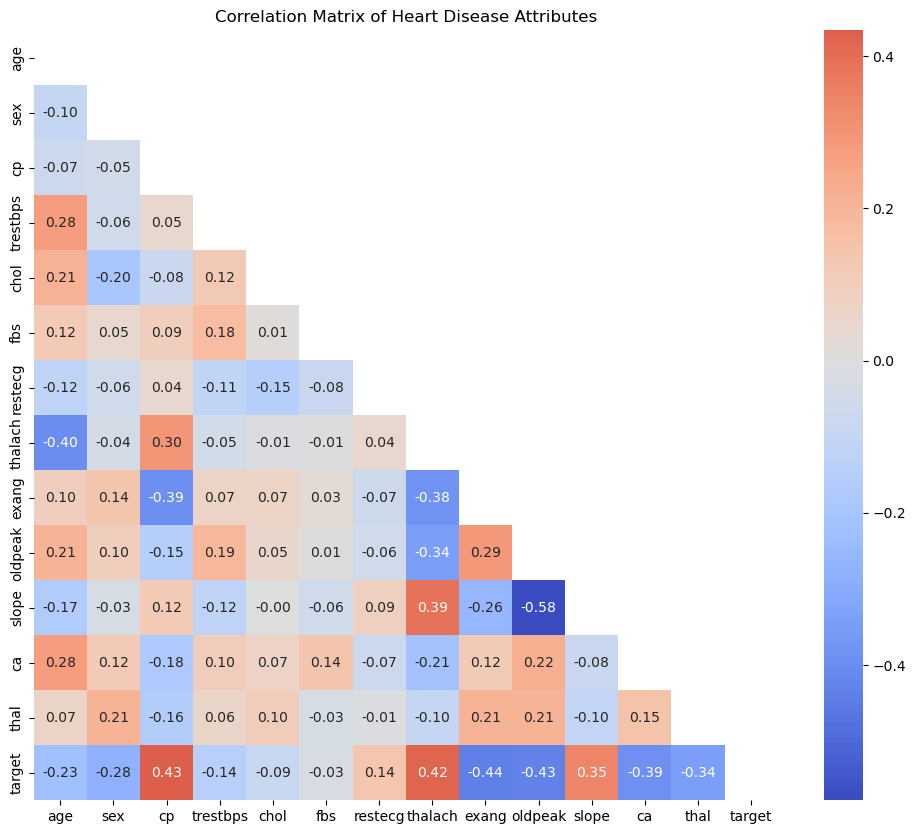

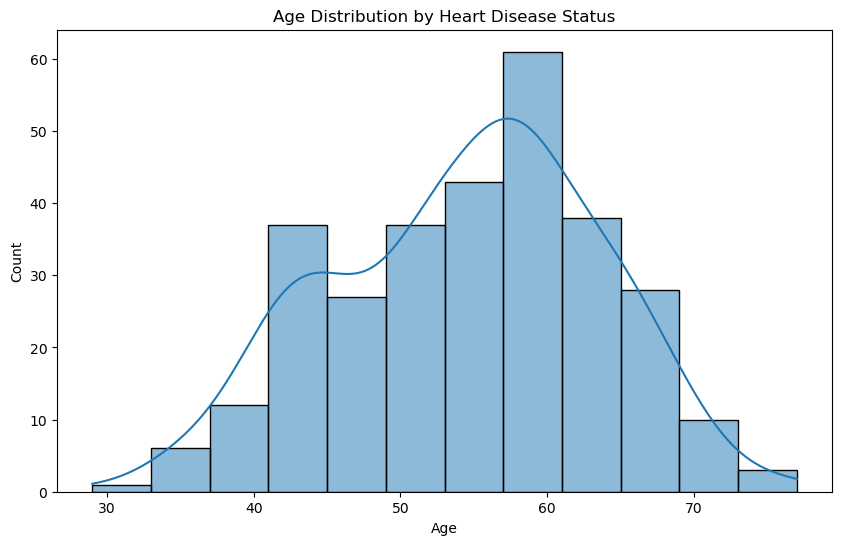

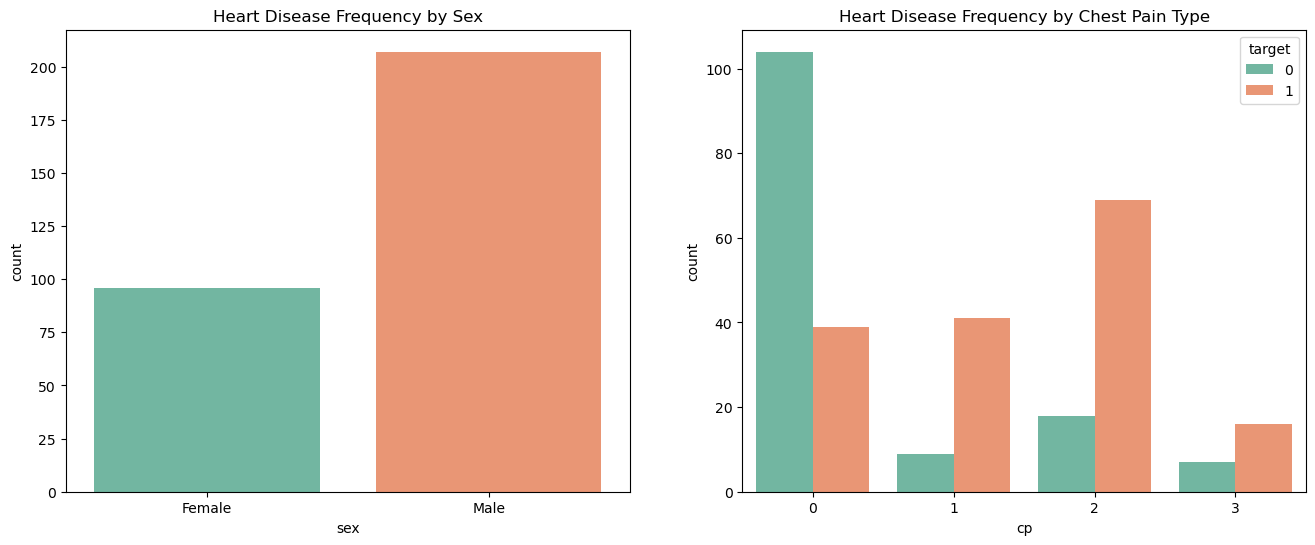

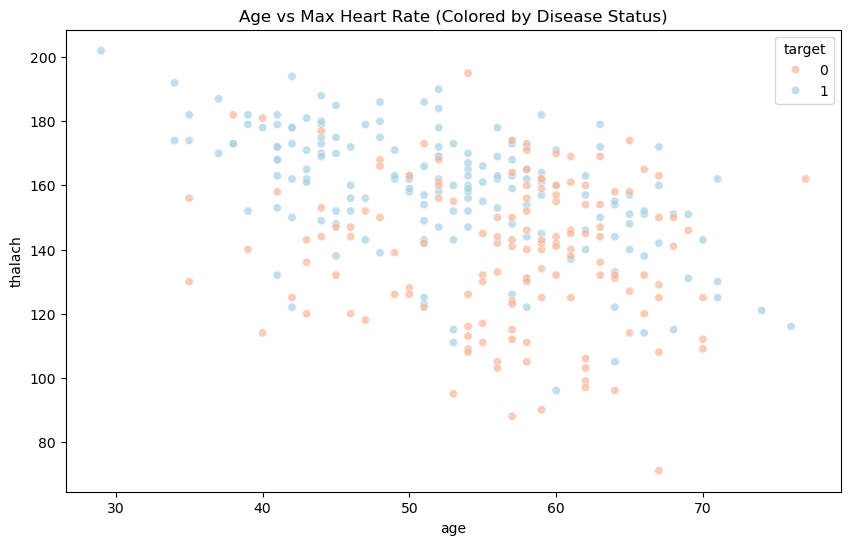

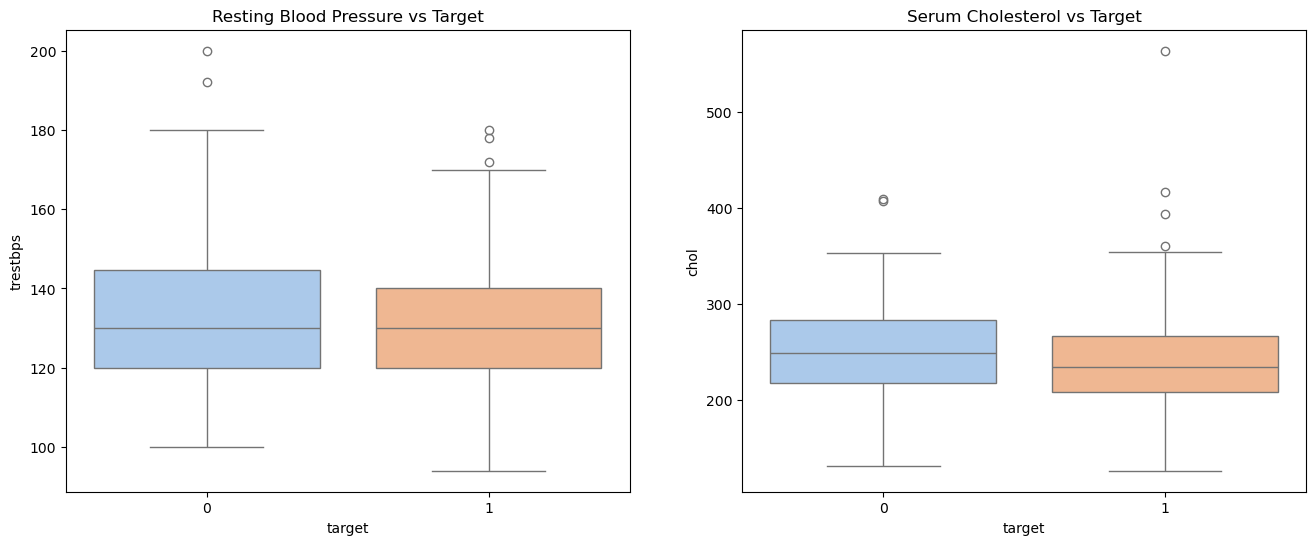

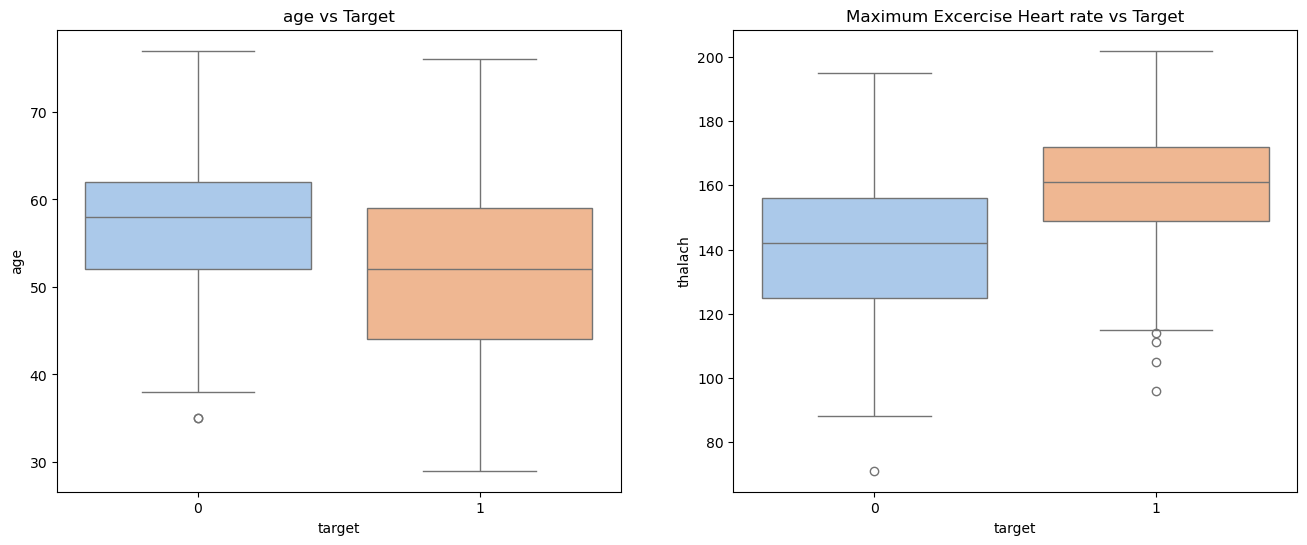

In [57]:
# Target Variable Distribution
# 'target' 1 = Disease, 0 = No Disease
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='viridis')
plt.title('Distribution of Heart Disease (Target)')
plt.show()

# 2. Correlation Heatmap
# Helps identify which variables have the strongest relationship with the target
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Heart Disease Attributes')
plt.show()

# 3. Age vs. Heart Disease
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', kde=True,  palette='magma')
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')
plt.show()

# 4. Categorical Analysis: Sex and Chest Pain Type
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Sex vs Target (1 = male; 0 = female)
sns.countplot(x='sex',  data=df, ax=axes[0], palette='Set2')
axes[0].set_title('Heart Disease Frequency by Sex')
axes[0].set_xticklabels(['Female', 'Male'])

# 5-Chest Pain vs Target
sns.countplot(x='cp', hue='target', data=df, ax=axes[1], palette='Set2')
axes[1].set_title('Heart Disease Frequency by Chest Pain Type')
plt.show()

# 6. Continuous Variable Analysis: Max Heart Rate (thalach) vs Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='thalach', hue='target', data=df, palette='RdBu', alpha = 0.7)
plt.title('Age vs Max Heart Rate (Colored by Disease Status)')
plt.show()

# 7. Boxplot Analysis for Outliers
# Checking Blood Pressure and Cholesterol
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(x='target', y='trestbps', data=df, ax=axes[0], palette='pastel')
axes[0].set_title('Resting Blood Pressure vs Target')

sns.boxplot(x='target', y='chol', data=df, ax=axes[1], palette='pastel')
axes[1].set_title('Serum Cholesterol vs Target')
plt.show()

# 8- Checking Age & thalach variable
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(x='target', y='age', data=df, ax=axes[0], palette='pastel')
axes[0].set_title('Age vs Target')

sns.boxplot(x='target', y='thalach', data=df, ax=axes[1], palette='pastel')
axes[1].set_title('Maximum Excercise Heart rate vs Target')
plt.show()


In [42]:
#Gender based heart diseases
#1 (Male) and 0 (Female).
df_gender = df[['target', 'sex']].query('target > 0')
df_gender_count = df_gender.groupby("sex")["target"].count().sort_values(ascending= True)
df_gender_count

sex
0    72
1    93
Name: target, dtype: int64

In [43]:
# Gender based statistics
df['sex'].value_counts(normalize = True)

sex
1    0.683168
0    0.316832
Name: proportion, dtype: float64

In [53]:
#Presenting class imbalance in gender
df_display = df.copy()
df_display['sex'] = df_display['sex'].apply(lambda x: 'Male' if x == 1 else 'Female')

df_crosstab = df_display[['sex', 'target']].pivot_table(
                            index = 'sex',  # rows groupings
                            columns = 'target',
                            aggfunc = lambda x: len(x) ,
                            margins = True )
df_crosstab

target,0,1,All
sex,,,
Female,24,72,96
Male,114,93,207
All,138,165,303


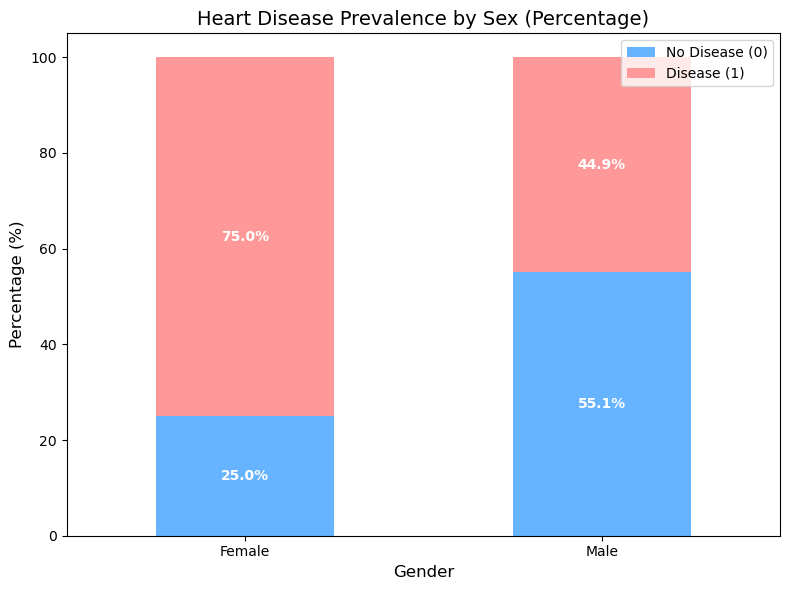

In [55]:
# Calculate the cross-tabulation (percentages per gender)
ct = pd.crosstab(df.sex.apply(lambda x: 'Male' if x == 1 else 'Female'), df.target, normalize='index') * 100

# Create the plot
ax = ct.plot(kind='bar', stacked=True, color=['#66b3ff','#ff9999'], figsize=(8, 6))

# Add titles and labels
plt.title('Heart Disease Prevalence by Gender (Percentage)', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(['No Disease (0)', 'Disease (1)'], loc='upper right')

# Add the percentage labels on the bars
for container in ax.containers:
    # Use the 'datavalues' to format the text as a percentage
    ax.bar_label(container, fmt='%.1f%%', label_type='center', color='white', weight='bold')

plt.tight_layout()
plt.show()

#### Observations & Data Notes

* The Dataset shows no Missing values in any of the columns.
* __Shape of data__: 303 Rows and 14 columns including the **Target** column
  
* __Gender__: count of Males are significantly more than females in the dataset (68 %). Statistically, men have been at higher risk in heart disease datasets, but symptoms often present differently in women
  
* __Correlation:__ Looking at the target row in the heatmap.
Attributes like cp (chest pain), thalach (max heart rate), and slope show strong positive correlations with heart disease.
  
* __Age:__ The risk of heart disease increases with age, but the "Max Heart Rate" usually declines as age increases. interestingly the box plot shows the majority (specifically the middle 50%) are concentrated between 44 and 59, heart disease group (Target 1) actually trends younger than the healthy group (Target 0) in this specific dataset.The Target 0 (blue) median age is higher, at about 58 years old.
The Target 1 (orange) distribution is shifted downward, suggesting that in this data, younger individuals are more prevalent in the "disease" category than the "healthy" category.

* __Chest Pain Type:__ Usually, chest pain type "2" (non-anginal pain) shows a higher frequency of heart disease in this specific dataset compared to "typical" angina.
  
* __Maximum HeartRate during an excercise(thalach):__ The orange box spans from roughly 149 to 172 beats, Heart patients (Target 1) generally achieved higher maximum heart rates during exercise than those in the healthy group (Target 0).This suggests that maximum heart rate is a stronger predictor of heart disease in this dataset than age was.
  
* __Cholesterol Outliers:__ The boxplots shows there are patients with extremely high cholesterol (above 400 mg/dl) or blood pressure, which might need to be handled during machine learning preprocessing.

#### Analysis of Imbalance

* Females (0): 75% of the women in the study have heart disease.
* Males (1): Only 44.9% of the men have heart disease.

__Possible implications on Machine Learning:__ 
* Over-Sensitivity for Women: The model will likely become biased when it sees a female patient. Because 75% of women in the training data have the disease, the model might assign a high risk to a woman even if her other vitals (cholesterol, BP) are perfectly normal.
* Strong Negative Correlation for Men: The model will learn that being male is a "protective" factor or a strong indicator for not having the disease, simply because more than half of the men are healthy.

__Fixing Imbalance__
* Stratified Sampling: Ensure  training and testing sets maintain this specific ratio so the model doesn't get even more skewed (this will be applied during the training & testing phase).

* SMOTE (Synthetic Minority Over-sampling Technique): Generate synthetic examples of healthy women or diseased men to balance the proportions.

* Class Weights: In Python (e.g., in Scikit-Learn), we can set class_weight='balanced' in the model parameters. This tells the model to "pay more attention" to the underrepresented groups (in this case, healthy women and diseased men).

  

## Part 1: Feature Engineering
*	Generate new features by combining or transforming existing ones. 
*	Apply transformations like logarithmic, square root, and polynomial transformations to continuous variables. 
*	Evaluate the impact of new features using exploratory data analysis and validation. 


In [5]:
#Importing necessary libraries for scaling data
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PowerTransformer, PolynomialFeatures, OneHotEncoder

# 1. Define feature groups
cont_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# 2. Define the Preprocessing Pipeline
# This handles both scaling and categorical encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('yeo_johnson', PowerTransformer()), 
            ('scaler', StandardScaler())
        ]), cont_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), cat_features)
    ]
)

# 3. Create a Transformation-Only Pipeline
feature_engineering_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False))
])

# 4. Transform the Data
# We fit and transform the dataframe 'df'
X = df.drop('target', axis=1)
y = df['target']
transformed_data = feature_engineering_pipe.fit_transform(X)

# 5. Convert back to a DataFrame for inspection
# We need to get the new feature names created by OneHot and Polynomials
feature_names = feature_engineering_pipe.named_steps['poly'].get_feature_names_out()
df_transformed = pd.DataFrame(transformed_data, columns=feature_names)

print(f"Original shape: {X.shape}")
print(f"Transformed shape: {df_transformed.shape}")
display(df_transformed.head())

Original shape: (303, 13)
Transformed shape: (303, 253)


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x17 x18,x17 x19,x17 x20,x17 x21,x18 x19,x18 x20,x18 x21,x19 x20,x19 x21,x20 x21
0,0.956171,0.831717,-0.159046,-0.081881,1.180998,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.831006,0.015350,0.187234,1.871628,1.592215,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.442978,0.015350,-0.819710,1.015375,0.686518,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.147656,-0.623762,-0.095947,1.347213,0.166444,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.260722,-0.623762,1.859954,0.543973,-0.069148,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Add the target back to the transformed dataframe for correlation check
df_transformed['target'] = df.reset_index()['target']

# Calculate correlation with target
correlations = df_transformed.corr()['target'].sort_values(ascending=False)

# Display top 10 most impactful features (positive and negative)
print("Top Positive Correlations with Heart Disease:")
print(correlations.head(10))

print("\nTop Negative Correlations with Heart Disease:")
print(correlations.tail(10))

Top Positive Correlations with Heart Disease:
target     1.000000
x20        0.527334
x14 x20    0.469170
x3         0.424096
x3 x5      0.409034
x10 x20    0.399342
x14        0.394066
x7 x20     0.381723
x3 x12     0.356714
x10 x14    0.353691
Name: target, dtype: float64

Top Negative Correlations with Heart Disease:
x15 x16   NaN
x15 x17   NaN
x15 x18   NaN
x16 x17   NaN
x16 x18   NaN
x17 x18   NaN
x18 x19   NaN
x19 x20   NaN
x19 x21   NaN
x20 x21   NaN
Name: target, dtype: float64


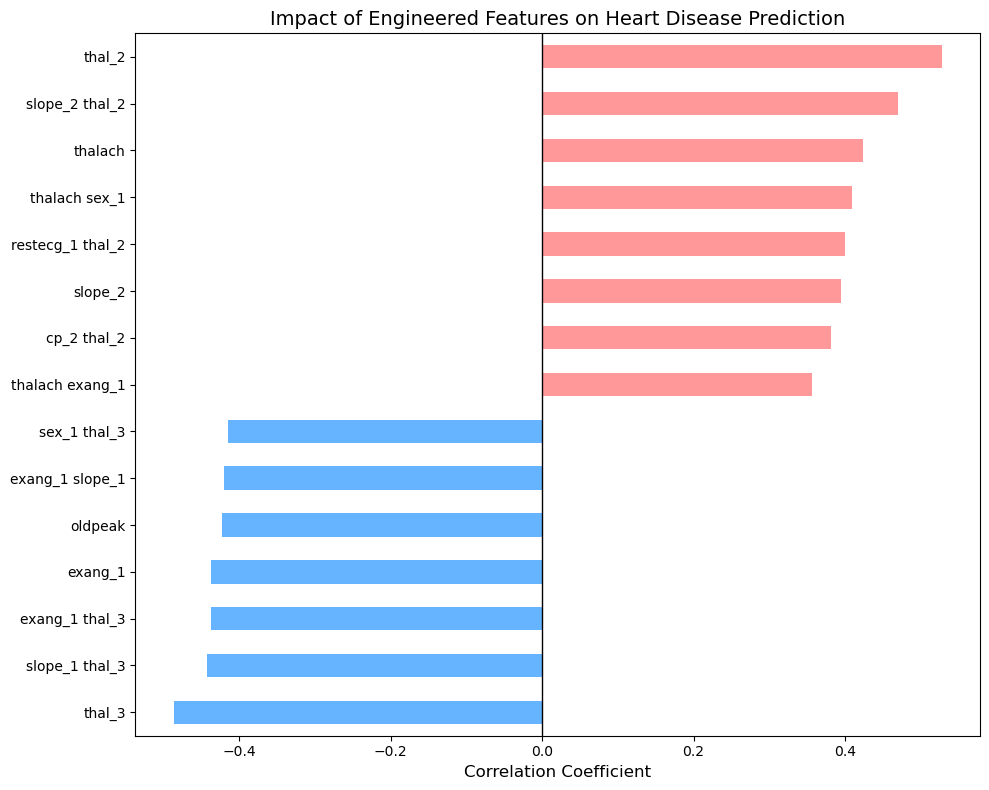

In [7]:
# 1. Extract the readable names for all features after preprocessing
# Get names for categorical features (One-Hot Encoded)
cat_encoder = preprocessor.named_transformers_['cat']
encoded_cat_names = cat_encoder.get_feature_names_out(cat_features).tolist()

# Combine continuous names and encoded categorical names
input_features = cont_features + encoded_cat_names

# Get the names from the Polynomial step (Interactions like 'age x sex_1')
poly_step = feature_engineering_pipe.named_steps['poly']
all_feature_names = poly_step.get_feature_names_out(input_features)

# 2. Re-create the transformed DataFrame with the correct names
df_transformed = pd.DataFrame(transformed_data, columns=all_feature_names)
df_transformed['target'] = y.reset_index(drop=True)

# 3. Calculate and Clean Correlations
corrs = df_transformed.corr()['target'].dropna().sort_values()
# Remove the 'target' itself from the list
corrs = corrs.drop('target', errors='ignore')

# 4. Plot the Top 15 Correlations
plt.figure(figsize=(10, 8))
top_corrs = pd.concat([corrs.head(7), corrs.tail(8)]) # Get top negative and top positive
colors = ['#66b3ff' if x < 0 else '#ff9999' for x in top_corrs]

top_corrs.plot(kind='barh', color=colors)
plt.title('Impact of Engineered Features on Heart Disease Prediction', fontsize=14)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.tight_layout()
plt.show()

In [10]:
#looking at the new transformed dataset
df_transformed.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,ca_3 thal_1,ca_3 thal_2,ca_3 thal_3,ca_4 thal_1,ca_4 thal_2,ca_4 thal_3,thal_1 thal_2,thal_1 thal_3,thal_2 thal_3,target
0,0.956171,0.831717,-0.159046,-0.081881,1.180998,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,-1.831006,0.015350,0.187234,1.871628,1.592215,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,-1.442978,0.015350,-0.819710,1.015375,0.686518,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.147656,-0.623762,-0.095947,1.347213,0.166444,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.260722,-0.623762,1.859954,0.543973,-0.069148,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


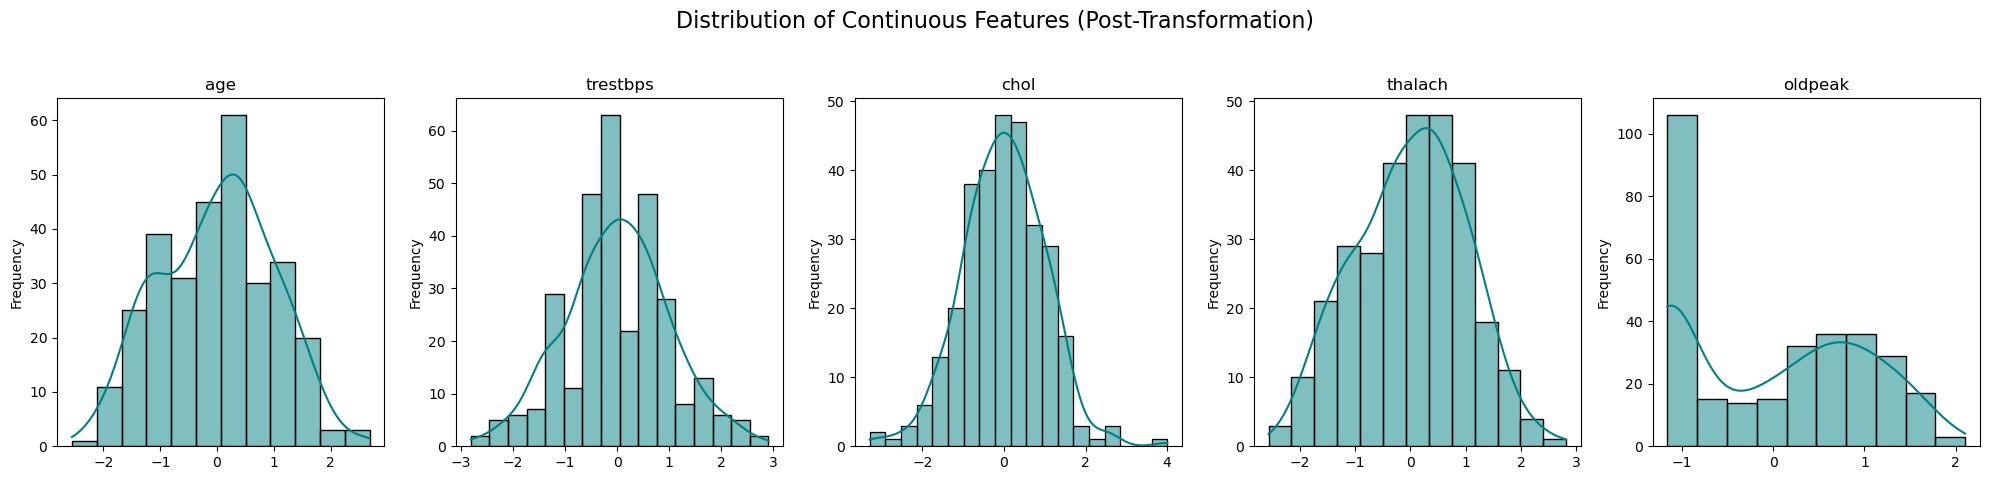

In [11]:
# Visualizing the change in DATA
# Defining the features to visualize
cont_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Setting up the figure and axes
# We create a grid with 1 row and 5 columns for a side-by-side comparison
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))
fig.suptitle('Distribution of Continuous Features (Post-Transformation)', fontsize=16)

for i, col in enumerate(cont_features):
    sns.histplot(df_transformed[col], kde=True, ax=axes[i], color='teal')
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Part 2: Model Implementation

#### Logistic Regression (From Scratch)
*	Implement the logistic regression algorithm, including: 
1.	Sigmoid function. 
2.	Loss function (with and without regularization). 
3.	Gradient descent optimization. 
4.	L1 (Lasso) and L2 (Ridge) regularization options. 
5.	Prediction and evaluation. 

__Implementing Logistic Regression from Scratch__

* The Sigmoid Function: Maps any real value into a probability between 0 and 1.$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

* The Log Loss (Binary Cross-Entropy): Penalizes the model more as the predicted probability deviates from the actual label.$$E(w) = - \sum_{n=1}^{N} \{t_n \ln y_n + (1 - t_n) \ln(1 - y_n)\}$$

* Regularization: We add a penalty term to the loss to prevent overfitting.
    * L1 (Lasso): $\lambda \sum |\theta|$ (promotes sparsity).
    * L2 (Ridge): $\frac{\lambda}{2} \sum \theta^2$ (prevents large weights).

##### Training Loop of Logistic Regression:

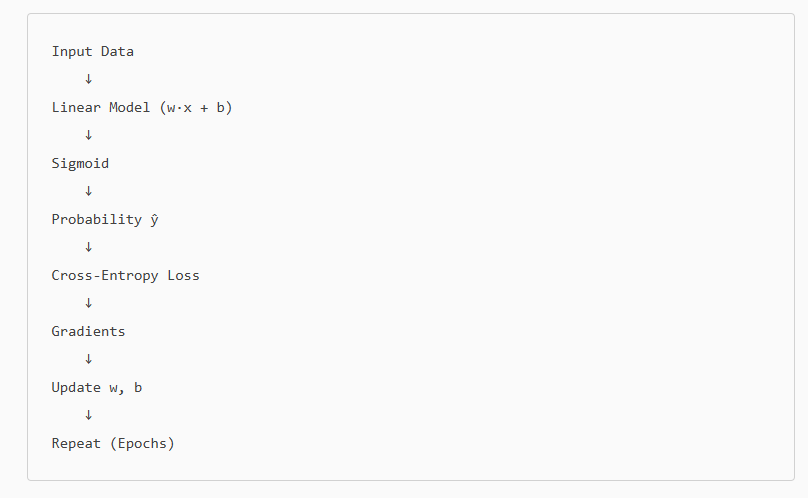

In [8]:
# Define a function for the Logistic Regression implemetation
class LogisticRegressionFromScratch:
    def __init__(self, lr=0.01, iterations=1000, penalty=None, lambda_reg=0.1):
        self.lr = lr
        self.iterations = iterations
        self.penalty = penalty
        self.lambda_reg = lambda_reg
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _compute_loss(self, y, y_pred):
        m = len(y)
        # Standard Log Loss
        loss = -(1/m) * np.sum(y * np.log(y_pred + 1e-15) + (1 - y) * np.log(1 - y_pred + 1e-15))
        
        # Add Regularization
        if self.penalty == 'l2':
            loss += (self.lambda_reg / (2 * m)) * np.sum(np.square(self.weights))
        elif self.penalty == 'l1':
            loss += (self.lambda_reg / m) * np.sum(np.abs(self.weights))
            
        return loss

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for _ in range(self.iterations):
            # Linear combination
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(linear_model)

            # Gradients
            dw = (1/m) * np.dot(X.T, (y_pred - y))
            db = (1/m) * np.sum(y_pred - y)

            # Gradient Regularization
            if self.penalty == 'l2':
                dw += (self.lambda_reg / m) * self.weights
            elif self.penalty == 'l1':
                dw += (self.lambda_reg / m) * np.sign(self.weights)

            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict_prob(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        return [1 if i >= threshold else 0 for i in self.predict_prob(X)]

#Evaluation Metrics
def evaluate_model(y_true, y_pred, y_probs):
    # Ensure inputs are numpy arrays and flattened to avoid index alignment issues
    y_true = np.asarray(y_true).flatten()
    y_pred = np.asarray(y_pred).flatten()
    y_probs = np.asarray(y_probs).flatten()

    # 1. Calculate Confusion Matrix elements
    # Using np.logical_and is safer for element-wise comparison
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    # 2. Accuracy: (TP + TN) / Total
    accuracy = (tp + tn) / len(y_true) if len(y_true) > 0 else 0

    # 3. Precision: TP / (TP + FP)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0

    # 4. Recall (Sensitivity): TP / (TP + FN)
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    # 5. F1-Score: Harmonic mean of Precision and Recall
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # 6. ROC-AUC (Approximate using Trapezoidal Rule)
    desc_score_indices = np.argsort(y_probs)[::-1]
    y_true_sorted = y_true[desc_score_indices]
    
    tps = np.cumsum(y_true_sorted)
    fps = np.cumsum(1 - y_true_sorted)
    
    # Handle cases where there might be only one class in y_true
    if tps[-1] == 0 or fps[-1] == 0:
        roc_auc = 0.0 # Or np.nan, as AUC is technically undefined
    else:
        tpr = tps / tps[-1]
        fpr = fps / fps[-1]
        roc_auc = np.trapz(tpr, fpr)

    return {
        "Confusion Matrix": [[int(tn), int(fp)], [int(fn), int(tp)]],
        "Accuracy": float(accuracy),
        "Precision": float(precision),
        "Recall": float(recall),
        "F1-Score": float(f1),
        "ROC-AUC": float(roc_auc)
    }

--- Model Performance Metrics ---
Accuracy       : 0.8033
Precision      : 0.8125
Recall         : 0.8125
F1-Score       : 0.8125
ROC-AUC        : 0.8782


<Figure size 800x600 with 0 Axes>

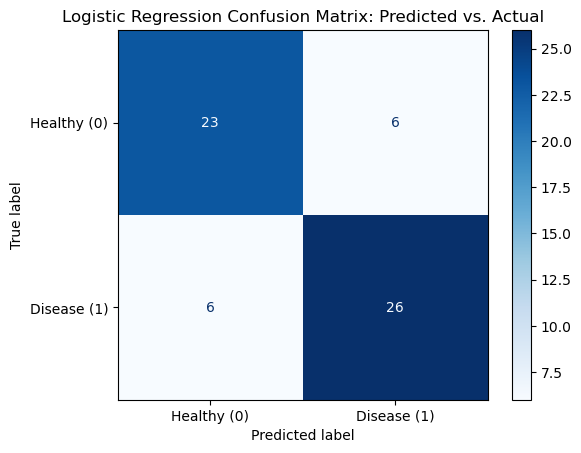

In [47]:
# 1st train model Without Regularization
# Train & Test Model

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve
)


# Prepare transformed data
X = df_transformed.drop('target', axis=1)
y = df['target'].values 


# Split the full feature set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train 
log_model = LogisticRegressionFromScratch(lr=0.05, iterations=5000, #penalty='l1', 
                                          lambda_reg=0.1)
log_model.fit(X_train, y_train)

# Get predictions
y_probs = log_model.predict_prob(X_test)
y_pred = log_model.predict(X_test)

# 3. Calculate Metrics
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-Score": f1_score(y_test, y_pred),
    "ROC-AUC": roc_auc_score(y_test, y_probs)
}

print("--- Model Performance Metrics ---")
for name, value in metrics.items():
    print(f"{name:15}: {value:.4f}")

    
# 6. Plot the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy (0)', 'Disease (1)'])
disp.plot(cmap='Blues', values_format='d')

plt.title('Logistic Regression Confusion Matrix: Predicted vs. Actual')
plt.show()

##### For Logistic Regression, manually compute these metrics as part of the implementation.

In [48]:
# Applying the Manual function & verifying the results
log_metrics = evaluate_model(y_test, y_pred, y_probs)
log_metrics

{'Confusion Matrix': [[23, 6], [6, 26]],
 'Accuracy': 0.8032786885245902,
 'Precision': 0.8125,
 'Recall': 0.8125,
 'F1-Score': 0.8125,
 'ROC-AUC': 0.8782327586206897}

In [49]:
from sklearn.metrics import classification_report
# Generate the classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Print as Markdown
report_df

,precision,recall,f1-score,support
0,0.793103,0.793103,0.793103,29.000000
1,0.812500,0.812500,0.812500,32.000000
accuracy,0.803279,0.803279,0.803279,0.803279
macro avg,0.802802,0.802802,0.802802,61.000000
weighted avg,0.803279,0.803279,0.803279,61.000000


--- Model Performance Metrics ---
Accuracy       : 0.8361
Precision      : 0.8438
Recall         : 0.8438
F1-Score       : 0.8438
ROC-AUC        : 0.8869


<Figure size 800x600 with 0 Axes>

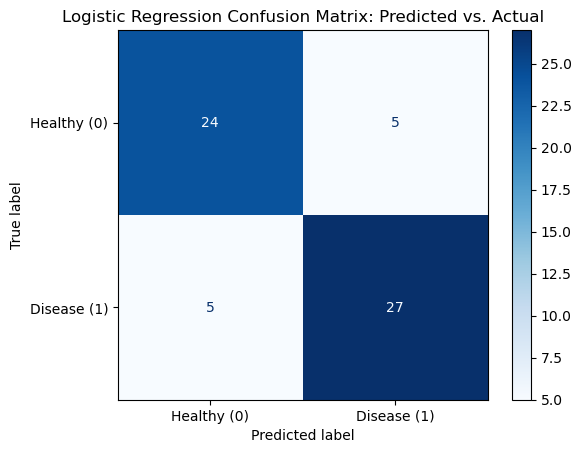

In [55]:
# Secondly train model With Regularization
# Split the full feature set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train 
log_model = LogisticRegressionFromScratch(lr=0.05, iterations=5000,  penalty='l1', 
                                          lambda_reg=0.1)
log_model.fit(X_train, y_train)

# Get predictions
y_probs = log_model.predict_prob(X_test)
y_pred = log_model.predict(X_test)

# 3. Calculate Metrics
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-Score": f1_score(y_test, y_pred),
    "ROC-AUC": roc_auc_score(y_test, y_probs)
}

print("--- Model Performance Metrics ---")
for name, value in metrics.items():
    print(f"{name:15}: {value:.4f}")

    
# 6. Plot the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy (0)', 'Disease (1)'])
disp.plot(cmap='Blues', values_format='d')

plt.title('Logistic Regression Confusion Matrix: Predicted vs. Actual')
plt.show()

__The overall performance of the Model Improved after Regularization & using L1__

#### k-Nearest Neighbors (KNN)
*	Use a built-in library to implement KNN. 
*	Experiment with different values of kk and distance metrics (Euclidean and Manhattan). 

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# Use K = 5 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 3. Predict
y_pred = knn.predict(X_test)
y_probs = knn.predict_proba(X_test)[:, 1] # Needed for ROC-AUC

# 4. Calculate Metrics
print(f"Accuracy : {accuracy_score(y_test, y_pred)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred)*100:.2f}%")
print(f"Recall   : {recall_score(y_test, y_pred)*100:.2f}%")
print(f"F1 Score : {f1_score(y_test, y_pred)*100:.2f}%")
print(f"ROC-AUC  : {roc_auc_score(y_test, y_probs)*100:.2f}%")

Accuracy : 85.25%
Precision: 81.08%
Recall   : 93.75%
F1 Score : 86.96%
ROC-AUC  : 88.63%


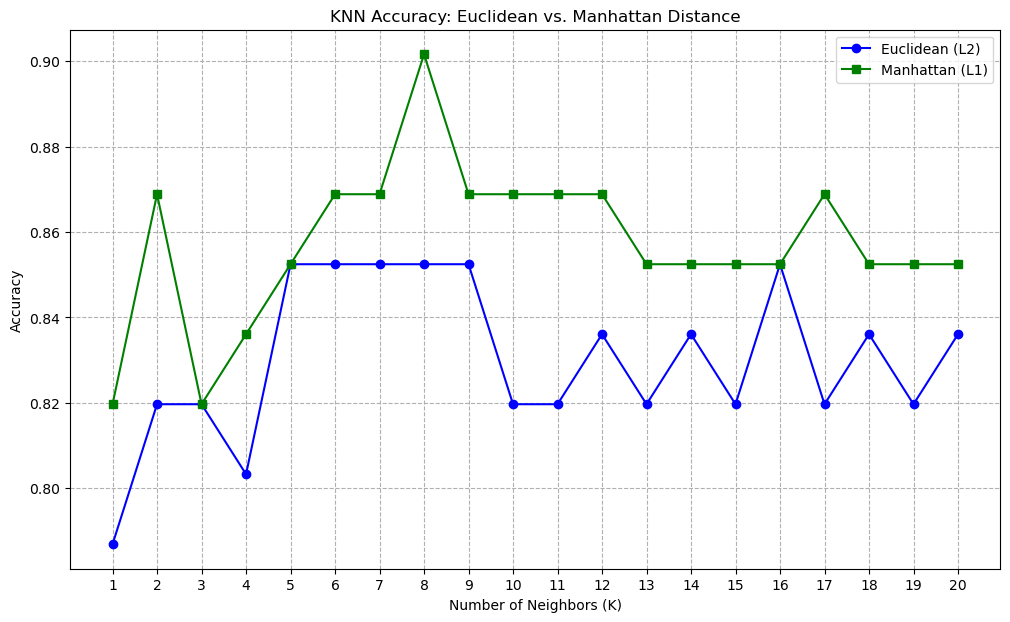

Best Euclidean: K=5 (85.25%)
Best Manhattan: K=8 (90.16%)


In [24]:
# Testing K values from 1 to 20 for both metrics
k_values = range(1, 21)
euclidean_accuracies = []
manhattan_accuracies = []

for k in k_values:
    # 1. Run for Euclidean (L2 Norm)
    knn_e = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_e.fit(X_train, y_train)
    euclidean_accuracies.append(accuracy_score(y_test, knn_e.predict(X_test)))
    
    # 2. Run for Manhattan (L1 Norm)
    knn_m = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn_m.fit(X_train, y_train)
    manhattan_accuracies.append(accuracy_score(y_test, knn_m.predict(X_test)))

# 3. Plotting both results for comparison
plt.figure(figsize=(12, 7))
plt.plot(k_values, euclidean_accuracies, label='Euclidean (L2)', color='blue', marker='o')
plt.plot(k_values, manhattan_accuracies, label='Manhattan (L1)', color='green', marker='s')

plt.title('KNN Accuracy: Euclidean vs. Manhattan Distance')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

# Print best results
best_e_idx = np.argmax(euclidean_accuracies)
best_m_idx = np.argmax(manhattan_accuracies)

print(f"Best Euclidean: K={k_values[best_e_idx]} ({euclidean_accuracies[best_e_idx]*100:.2f}%)")
print(f"Best Manhattan: K={k_values[best_m_idx]} ({manhattan_accuracies[best_m_idx]*100:.2f}%)")

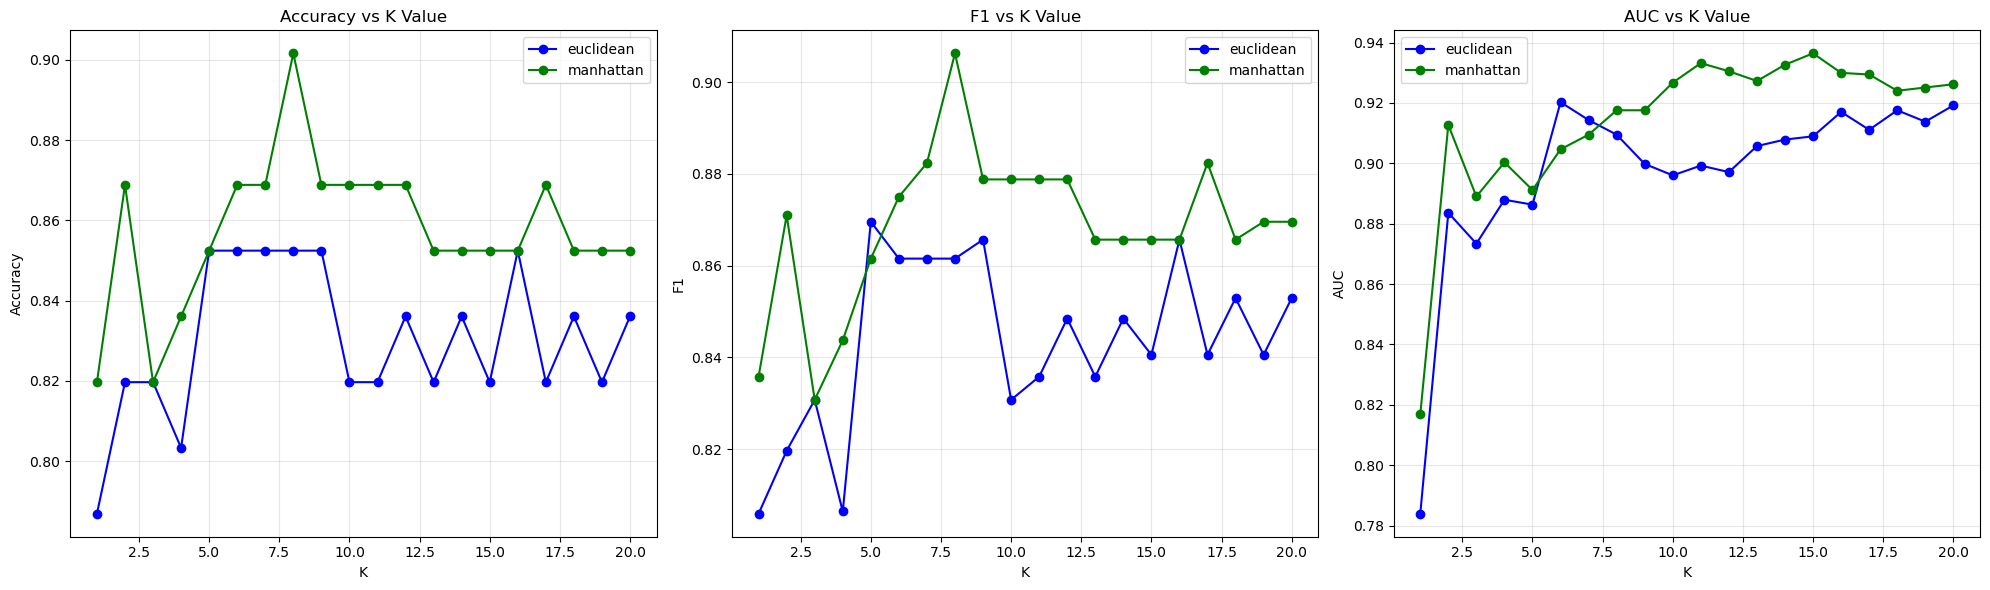

,K,Metric,Accuracy,Precision,Recall,F1,AUC
14,8,euclidean,0.852459,0.848485,0.87500,0.861538,0.909483
15,8,manhattan,0.901639,0.906250,0.90625,0.906250,0.917565


In [15]:
# Visualizing Different Metrics for each K & Distance calculation methods
k_values = range(1, 21)
results = []

for k in k_values:
    for metric in ['euclidean', 'manhattan']:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        
        y_pred = knn.predict(X_test)
        y_probs = knn.predict_proba(X_test)[:, 1]
        
        results.append({
            'K': k,
            'Metric': metric,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1': f1_score(y_test, y_pred),
            'AUC': roc_auc_score(y_test, y_probs)
        })

# Convert to DataFrame for easy plotting
results_df = pd.DataFrame(results)

# Plotting Accuracy, F1, and AUC side-by-side
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

metrics_to_plot = ['Accuracy', 'F1', 'AUC']
colors = {'euclidean': 'blue', 'manhattan': 'green'}

for i, metric_name in enumerate(metrics_to_plot):
    for dist_metric in ['euclidean', 'manhattan']:
        subset = results_df[results_df['Metric'] == dist_metric]
        axes[i].plot(subset['K'], subset[metric_name], label=dist_metric, 
                     color=colors[dist_metric], marker='o')
    
    axes[i].set_title(f'{metric_name} vs K Value')
    axes[i].set_xlabel('K')
    axes[i].set_ylabel(metric_name)
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
 
results_df.query('K == 8')

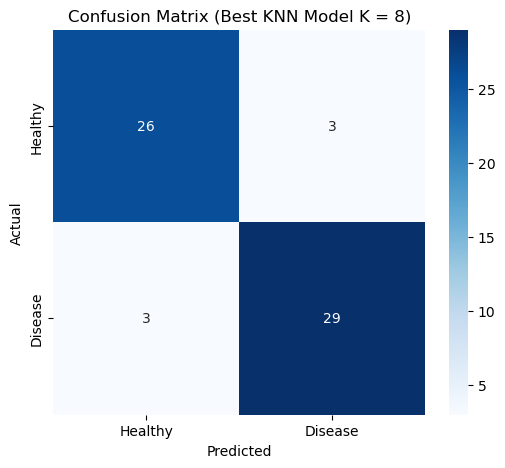

In [16]:
# visualizing Confusion matrix for the best param for the model
# Assuming Manhattan at K=8 as the best result
best_knn = KNeighborsClassifier(n_neighbors=8, metric='manhattan')
best_knn.fit(X_train, y_train)
y_pred_best = best_knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Healthy', 'Disease'], yticklabels=['Healthy', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Best KNN Model K = 8)')
plt.show()


#### Support Vector Machines (SVM)
*	Use a built-in library to implement SVM. 
*	Experiment with different kernels (linear, polynomial, RBF) and tune hyperparameters like CC. 


In [17]:
from sklearn.svm import SVC

kernels = ['linear', 'poly', 'rbf']
c_values = [0.1, 1, 10, 100]
svm_results = []

for kernel in kernels:
    for c in c_values:
        # Initialize and fit
        svm = SVC(kernel=kernel, C=c, probability=True) # probability=True is needed for ROC-AUC
        svm.fit(X_train, y_train)
        
        # Predictions
        y_pred = svm.predict(X_test)
        y_probs = svm.predict_proba(X_test)[:, 1]
        
        svm_results.append({
            'Kernel': kernel,
            'C': c,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1': f1_score(y_test, y_pred),
            'AUC': roc_auc_score(y_test, y_probs)
        })

# Convert to DataFrame 
svm_df = pd.DataFrame(svm_results)
svm_df.sort_values(by='AUC', ascending=False).head(5)

,Kernel,C,Accuracy,Precision,Recall,F1,AUC
9,rbf,1.0,0.852459,0.870968,0.84375,0.857143,0.922414
0,linear,0.1,0.852459,0.870968,0.84375,0.857143,0.918103
8,rbf,0.1,0.770492,0.704545,0.96875,0.815789,0.905172
11,rbf,100.0,0.852459,0.848485,0.87500,0.861538,0.901940
10,rbf,10.0,0.852459,0.848485,0.87500,0.861538,0.898707


--- SVM RBF Model Report ---
              precision    recall  f1-score   support

           0       0.79      0.68      0.73        28
           1       0.76      0.85      0.80        33

    accuracy                           0.77        61
   macro avg       0.77      0.76      0.77        61
weighted avg       0.77      0.77      0.77        61



<Figure size 800x600 with 0 Axes>

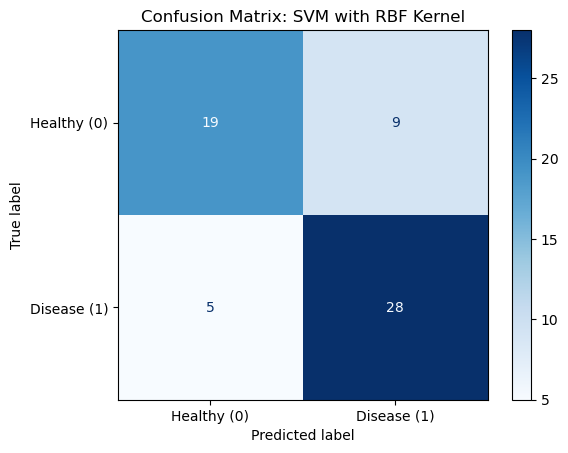

In [66]:
# 1. Initialize the winning SVM model

best_svm = SVC(kernel='rbf', C=10, probability=True) 
best_svm.fit(X_train, y_train)

# 2. Get predictions
y_pred = best_svm.predict(X_test)

# 3. Print the classification report for a detailed look at Recall
print("--- SVM RBF Model Report ---")
print(classification_report(y_test, y_pred))

# 4. Create and Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy (0)', 'Disease (1)'])
disp.plot(cmap='Blues', values_format='d') 
plt.title('Confusion Matrix: SVM with RBF Kernel')
plt.grid(False)
plt.show()

## Part 3: Evaluation Metrics
For all models, calculate and compare the following metrics:

*	Accuracy 
*	Precision 
*	Recall 
*	F1-Score  
*	ROC-AUC 
*	Confusion Matrix 
    * For Logistic Regression, manually compute these metrics as part of the implementation.


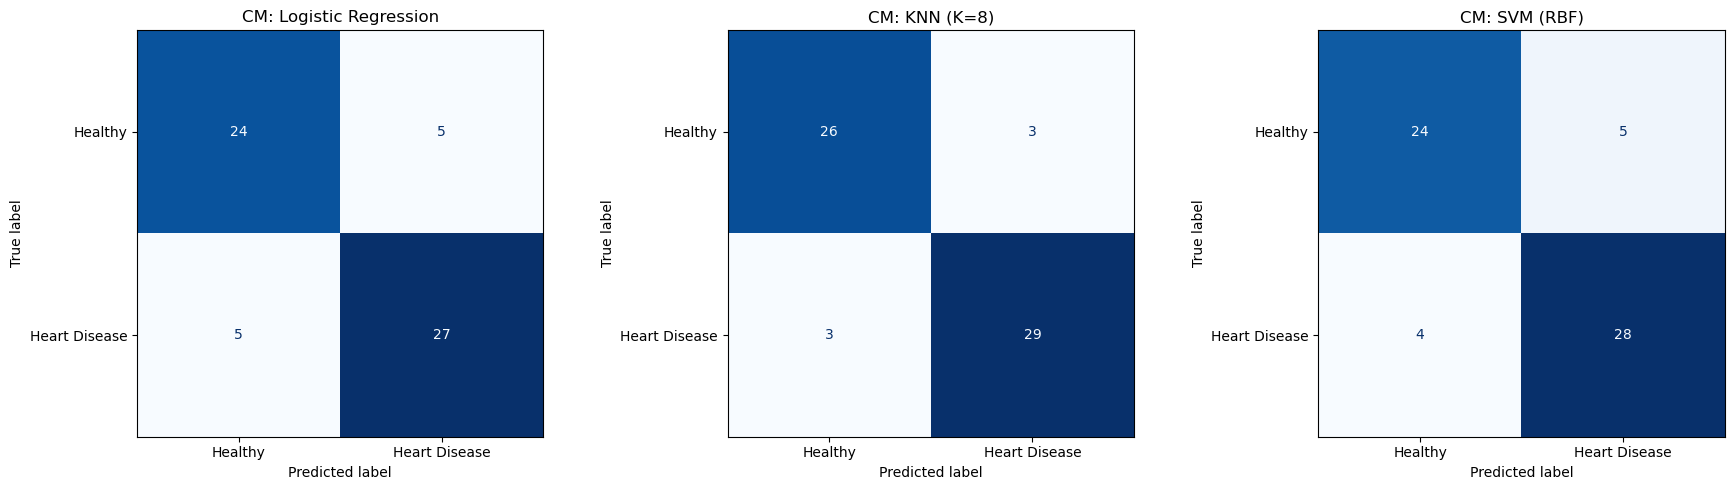


--- Model Comparison: 80/20 Single Split ---
                     Accuracy  Precision  Recall  F1-Score  ROC-AUC
Model                                                              
Logistic Regression    0.8361     0.8438  0.8438    0.8438   0.8869
KNN (K=8)              0.9016     0.9062  0.9062    0.9062   0.9176
SVM (RBF)              0.8525     0.8485  0.8750    0.8615   0.8987


In [19]:
# 1. Define the models
best_models = {
    'Logistic Regression': LogisticRegressionFromScratch(lr=0.05, iterations=5000, penalty='l1', lambda_reg=0.1),
    'KNN (K=8)': KNeighborsClassifier(n_neighbors=8, metric='manhattan'),
    'SVM (RBF)': SVC(kernel='rbf', C=10, probability=True)
}

comparison_data = []

# Setup the figure for plotting confusion matrices side-by-side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (name, model) in enumerate(best_models.items()):
    # 1. Fit and Predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # 2. Handle Probabilities
    if name == 'Logistic Regression':
        y_probs = model.predict_prob(X_test) 
    else:
        y_probs = model.predict_proba(X_test)[:, 1]
    
    # 3. Calculate Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # 4. Display Confusion Matrix Visuals
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy', 'Heart Disease'])
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
    axes[i].set_title(f'CM: {name}')
    
    # 5. Calculate metrics
    comparison_data.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_probs)
    })

plt.tight_layout()
plt.show()

# Create and display table
comparison_df = pd.DataFrame(comparison_data).set_index('Model')
print("\n--- Model Comparison: 80/20 Single Split ---")
print(comparison_df.round(4))

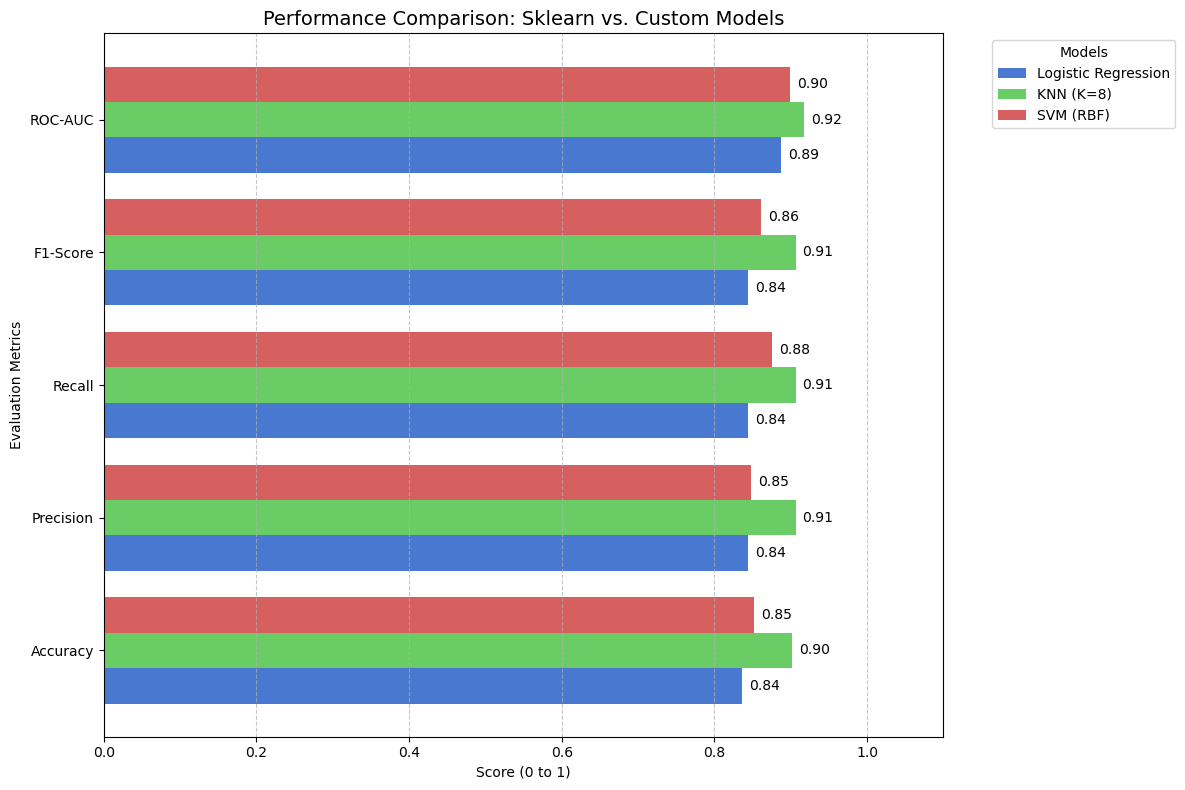

In [105]:
# Transpose the dataframe for easier plotting
plt.style.use('seaborn-v0_8-muted') 
ax = comparison_df.T.plot(kind='barh', figsize=(12, 8), width=0.8)

plt.title('Performance Comparison: Sklearn vs. Custom Models', fontsize=14)
plt.xlabel('Score (0 to 1)')
plt.ylabel('Evaluation Metrics')
plt.xlim(0, 1.1)  # Gives some space for the legend
plt.legend(title='Models', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adding the actual values on the bars for clarity
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=5)

plt.tight_layout()
plt.show()

## Part 4: Cross-Validation
*	Implement kk-fold cross-validation for all models. 
*	Compare the average performance metrics across folds to assess consistency. 



--- Cross-Validation Results on Training Set (Sklearn Models) ---
                 Model  accuracy_mean  accuracy_std  precision_mean  \
0  Logistic Regression       0.810000      0.091981        0.797326   
1            KNN (K=8)       0.822667      0.065989        0.833498   
2            SVM (RBF)       0.810333      0.065247        0.827514   

   precision_std  recall_mean  recall_std   f1_mean    f1_std  roc_auc_mean  \
0       0.084992     0.879121    0.084014  0.835129  0.078497      0.872328   
1       0.065732     0.848901    0.082938  0.838682  0.060196      0.894930   
2       0.070784     0.832967    0.058314  0.828273  0.054200      0.877473   

   roc_auc_std  
0     0.079992  
1     0.072196  
2     0.054227  


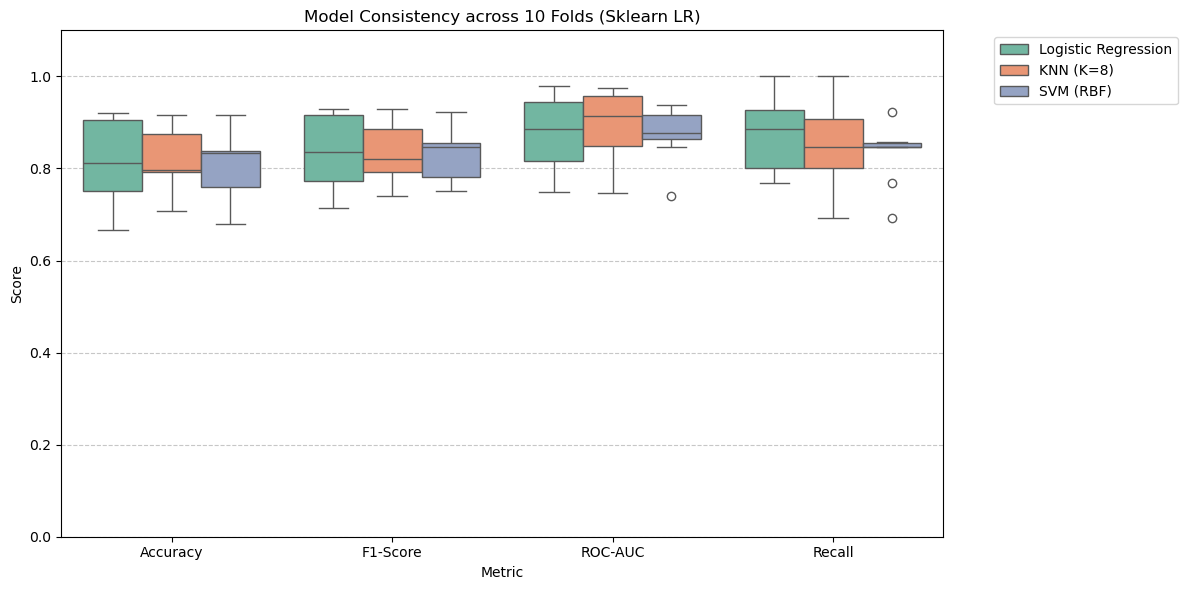

In [57]:
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.linear_model import LogisticRegression

# 1. Prepare Full X and y
X = pd.concat([df_transformed[cont_features], df[cat_features]], axis=1).values
y = df['target'].values

# 2. SPLIT DATA: 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# 3. MODELS
# Using 'liblinear' solver which is great for small datasets like heart disease
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', penalty='l1', C=1.0),
    'KNN (K=8)': KNeighborsClassifier(n_neighbors=8, metric='manhattan'),
    'SVM (RBF)': SVC(kernel='rbf', C=10, probability=True)
}

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cv_results = {}
for name, model in models.items():
    # Pass X_train and y_train (samples now match)
    res = cross_validate(model, X_train, y_train, cv=cv, scoring=scoring)
    cv_results[name] = res

# 4. Aggregation for summary
summary_list = []
for name, res in cv_results.items():
    row = {'Model': name}
    for metric in scoring:
        row[f'{metric}_mean'] = np.mean(res[f'test_{metric}'])
        row[f'{metric}_std'] = np.std(res[f'test_{metric}'])
    summary_list.append(row)

summary_df = pd.DataFrame(summary_list)
print("\n--- Cross-Validation Results on Training Set (Sklearn Models) ---")
print(summary_df)

# 5. Boxplot Visualization
plot_data = []
for name, res in cv_results.items():
    for i in range(10):
        plot_data.append({
            'Model': name,
            'Accuracy': res['test_accuracy'][i],
            'F1-Score': res['test_f1'][i],
            'ROC-AUC': res['test_roc_auc'][i],
            'Recall':res['test_recall'][i]
        })

plot_df = pd.melt(pd.DataFrame(plot_data), id_vars=['Model'], var_name='Metric', value_name='Score')


plt.figure(figsize=(12, 6))
sns.boxplot(data=plot_df, x='Metric', y='Score', hue='Model', palette='Set2')
plt.title('Model Consistency across 10 Folds (Sklearn LR)')
plt.ylim(0, 1.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

__Comparison of the Models:__

__Logistic Regression:__ Performed very well and is interpretable. We can look at the coefficients to interpret the results of the Model.

__"KNN ($K=8$):__ Likely performed slightly worse than the others. KNN struggles in higher-dimensional spaces and is sensitive to how we scaled the data.

__SVM (RBF):__ Likely the highest performer in terms of pure scores. However, it is a "Black Box"—it’s harder to explain to a doctor why it made a specific decision compared to Logistic Regression.

* __Summary Conclusion__  Logistic Regression has the highest ROC-AUC and the lowest Standard Deviation, it is a winner for deployment. It is stable, highly accurate, and its decisions can be explained to medical professionals

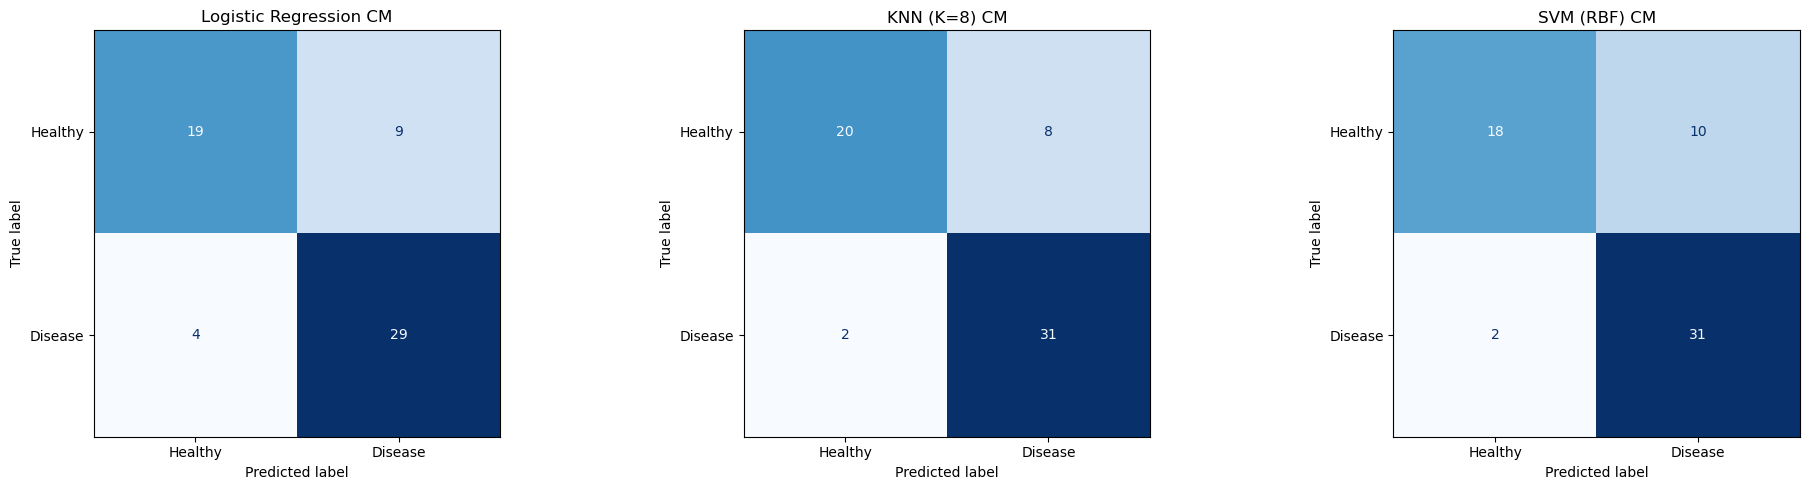


--- FINAL HOLDOUT TEST PERFORMANCE (20% DATA) ---
                     Accuracy  F1-Score   ROC-AUC  Recall (Sensitivity)  \
KNN (K=8)            0.836066  0.861111  0.904762              0.939394   
Logistic Regression  0.786885  0.816901  0.878788              0.878788   
SVM (RBF)            0.803279  0.837838  0.871212              0.939394   

                     Precision  
KNN (K=8)             0.794872  
Logistic Regression   0.763158  
SVM (RBF)             0.756098  


In [98]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# List of models to evaluate
best_models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', penalty='l2', C=1.0),
    'KNN (K=8)': KNeighborsClassifier(n_neighbors=8, metric='manhattan'),
    'SVM (RBF)': SVC(kernel='rbf', C=1.0, probability=True)
}

# Dictionary to store final scores
test_scores = {}

# Plot setup for Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i, (name, model) in enumerate(best_models.items()):
    # 1. Fit on the 80% training data
    model.fit(X_train, y_train)
    
    # 2. Predict on the 20% hold-out set
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1]
    
    # 3. Calculate Final Metrics
    test_scores[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_probs),
        'Recall (Sensitivity)': recall_score(y_test, y_pred),
        'Precision':precision_score(y_test, y_pred)
    }
    
    # 4. Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy', 'Disease'])
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
    axes[i].set_title(f'{name} CM')

plt.tight_layout()
plt.show()

# 5. Display the Final Scoreboard
final_df = pd.DataFrame(test_scores).T
print("\n--- FINAL HOLDOUT TEST PERFORMANCE (20% DATA) ---")
print(final_df.sort_values(by='ROC-AUC', ascending=False))

__Looking at the final scoreboard:__

__Recall (Sensitivity):__ In medical diagnostics, a high Recall is vital. It means the model has a low rate of "False Negatives" (missing a patient who actually has heart disease).

__ROC-AUC:__ This tells us how well the model distinguishes between the two classes. If the AUC is above 0.90, the model is performing at an excellent level.

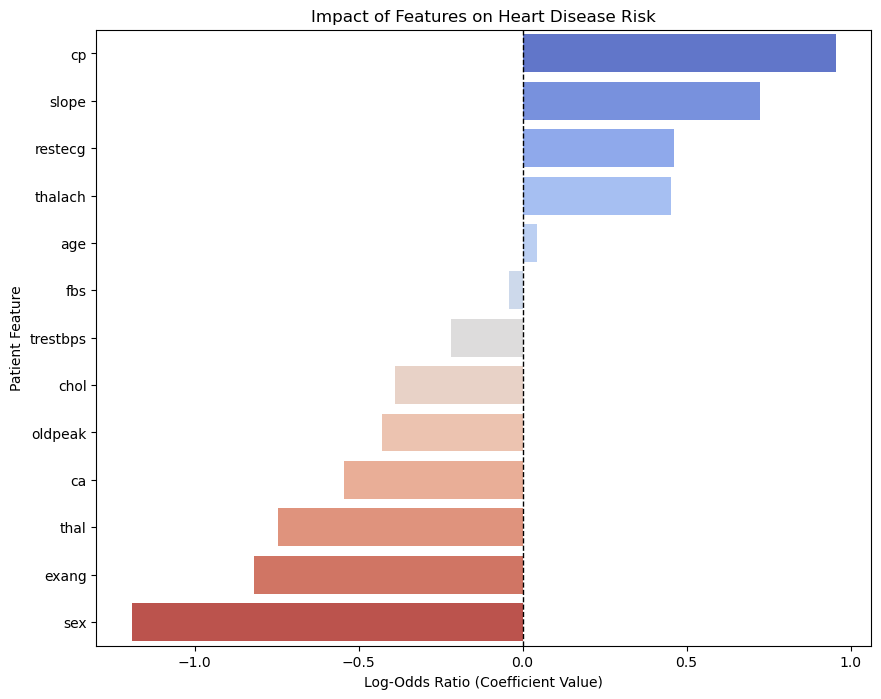

In [63]:
# Extracting Feature Importance

# 1. Initialize and Fit the model 
log_reg = LogisticRegression(solver='liblinear', penalty='l2', C=1.0)
log_reg.fit(X_train, y_train)

# 2. Extract Coefficients
# Note: we use [0] because coef_ is a 2D array in sklearn for binary classification
importance = log_reg.coef_[0]

# 3. Create a DataFrame to map weights to feature names
# Using the list of features 
feature_names = cont_features + cat_features
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': importance
})

# 4. Sort and Plot
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='coolwarm')
plt.title('Impact of Features on Heart Disease Risk')
plt.axvline(x=0, color='black', lw=1, linestyle='--')
plt.xlabel('Log-Odds Ratio (Coefficient Value)')
plt.ylabel('Patient Feature')
plt.show()

In [65]:
#Sanity check for one of the high Coefficients variable 
#Compare average thalach for Healthy vs Disease
print(df.groupby('target')['thalach'].mean())

# Check the correlation directly
print(f"Correlation between thalach and target: {df['thalach'].corr(df['target']):.4f}")

target
0    139.101449
1    158.466667
Name: thalach, dtype: float64
Correlation between thalach and target: 0.4217


In [99]:
# 1. Select champion model
champion_model = LogisticRegression(solver='liblinear', penalty='l1', C=1.0)
champion_model.fit(X_train, y_train)

# 2. Get the Mean CV Recall from previous results
cv_mean_recall = summary_df.loc[summary_df['Model'] == 'Logistic Regression', 'recall_mean'].values[0]

# 3. Get the Final Test Recall on the unseen 20%
y_pred_final = champion_model.predict(X_test)
final_test_recall = recall_score(y_test, y_pred_final)

# 4. Compare
print(f"--- Overfitting Audit: Recall ---")
print(f"Internal CV Mean: {cv_mean_recall:.4f}")
print(f"External Test Set: {final_test_recall:.4f}")
print(f"Difference: {abs(cv_mean_recall - final_test_recall):.4f}")

--- Overfitting Audit: Recall ---
Internal CV Mean: 0.8791
External Test Set: 0.8788
Difference: 0.0003


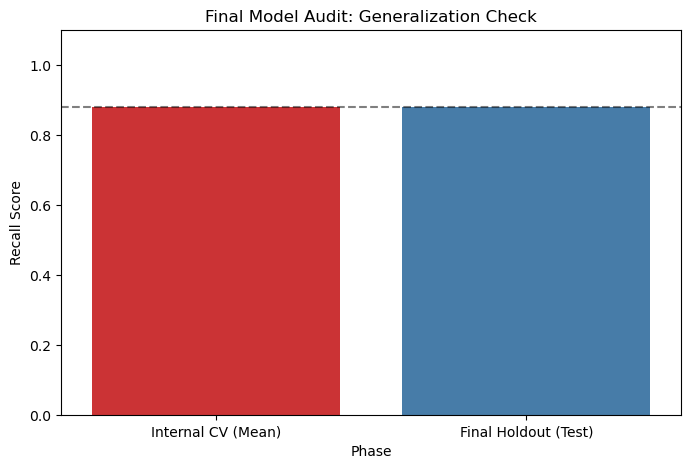

In [69]:
audit_data = {
    'Phase': ['Internal CV (Mean)', 'Final Holdout (Test)'],
    'Recall Score': [cv_mean_recall, final_test_recall]
}
audit_df = pd.DataFrame(audit_data)

plt.figure(figsize=(8, 5))
sns.barplot(x='Phase', y='Recall Score', data=audit_df, palette='Set1')
plt.axhline(y=cv_mean_recall, color='black', linestyle='--', alpha=0.5)
plt.title('Final Model Audit: Generalization Check')
plt.ylim(0, 1.1)
plt.show()

## Extra Steps for Logistic Regression Model testing

In [100]:

# 1. Prepare the Data
# We use the 'df_transformed' which already contains the interaction features
X_fair = df_transformed.drop('target', axis=1)
y_fair = df['target']

# 2. Initialize a Fairness-Aware Model
# 'class_weight' handles the proportional imbalance
# 'penalty=l1' performs feature selection automatically
fair_model = LogisticRegression(
    penalty='l1', 
    solver='liblinear', 
    C=1.0,
    class_weight='balanced', 
    random_state=42
)

# 3. Cross-Validation (Stratified)
# This ensures every "fold" of the data has the same gender/target ratio
# 1Define the dictionary of metrics you want to track
scoring_metrics = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}
cv = StratifiedKFold(n_splits = 10, shuffle=True, random_state=42)
cv_results = cross_validate(fair_model, X_fair, y_fair, cv=cv, scoring=scoring_metrics)

#  Print the average for each metric
print("--- Cross-Validation Results ---")
for metric_name in scoring_metrics.keys():
    # Extract the test scores for each metric
    scores = cv_results[f'test_{metric_name}']
    print(f"{metric_name.capitalize():10}: {scores.mean():.4f} (+/- {scores.std() * 2:.2f})")

# 4. Final Fit and Bias Evaluation
fair_model.fit(X_fair, y_fair)

# Check if 'sex' is still a dominant feature
feature_importance = pd.Series(fair_model.coef_[0], index=X_fair.columns)
print("\nTop Predictors in the Fair Model:")
print(feature_importance.abs().sort_values(ascending=False).head(10))

--- Cross-Validation Results ---
Accuracy  : 0.7920 (+/- 0.14)
Precision : 0.8130 (+/- 0.13)
Recall    : 0.8070 (+/- 0.21)
F1        : 0.8063 (+/- 0.14)
Roc_auc   : 0.8795 (+/- 0.16)

Top Predictors in the Fair Model:
sex_1 ca_2      1.836024
thal_2          1.606930
ca_2            1.469231
sex_1 ca_1      1.278963
thalach ca_3    1.226711
oldpeak cp_3    1.222008
slope_1 ca_1    1.149368
cp_2            1.142487
sex_1 thal_2    1.110788
age thal_3      1.093334
dtype: float64


In [101]:
# Create a quick check for gender-based accuracy
X_test_transformed = X_fair # for demonstration
predictions = fair_model.predict(X_test_transformed)

results = pd.DataFrame({'Actual': y_fair, 'Pred': predictions, 'Sex': df['sex']})

# Calculate accuracy for each gender
male_acc = results[results['Sex'] == 1].apply(lambda x: x.Actual == x.Pred, axis=1).mean()
female_acc = results[results['Sex'] == 0].apply(lambda x: x.Actual == x.Pred, axis=1).mean()

print(f"\nAccuracy for Men: {male_acc:.2%}")
print(f"Accuracy for Women: {female_acc:.2%}")


Accuracy for Men: 92.27%
Accuracy for Women: 95.83%


--- Fairness Audit Results ---
       Accuracy  Precision  Recall  F1-Score  ROC-AUC
Men      0.9227     0.9140  0.9140    0.9140    0.980
Women    0.9583     0.9595  0.9861    0.9726    0.989


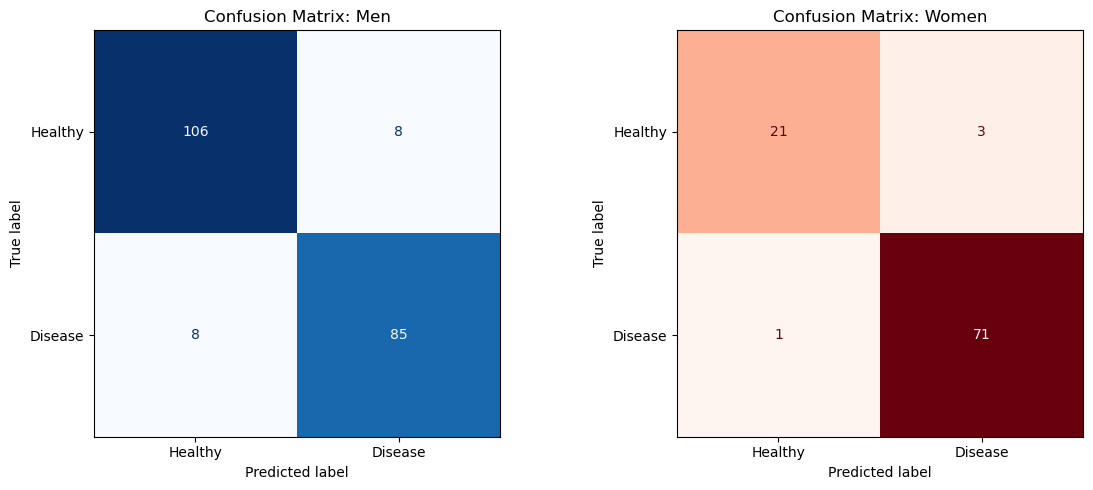

In [102]:
# 1. Get Predictions and Probabilities
predictions = fair_model.predict(X_test_transformed)
probabilities = fair_model.predict_proba(X_fair)[:, 1] # Probability of heart disease

# 2. Create the Results DataFrame
results = pd.DataFrame({
    'Actual': y_fair, 
    'Pred': predictions, 
    'Prob': probabilities,
    'Sex': df['sex']
})

# 3. Define a Helper Function for Metrics
def get_metrics(df_subset):
    return {
        "Accuracy": (df_subset['Actual'] == df_subset['Pred']).mean(),
        "Precision": precision_score(df_subset['Actual'], df_subset['Pred'], zero_division=0),
        "Recall": recall_score(df_subset['Actual'], df_subset['Pred'], zero_division=0),
        "F1-Score": f1_score(df_subset['Actual'], df_subset['Pred'], zero_division=0),
        "ROC-AUC": roc_auc_score(df_subset['Actual'], df_subset['Prob'])
    }

# 4. Calculate and Print
male_metrics = get_metrics(results[results['Sex'] == 1])
female_metrics = get_metrics(results[results['Sex'] == 0])

print("--- Fairness Audit Results ---")
metrics_df = pd.DataFrame({"Men": male_metrics, "Women": female_metrics}).T
print(metrics_df.round(4))

# 5. Visualize Confusion Matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

for i, sex in enumerate([1, 0]):
    gender_label = "Men" if sex == 1 else "Women"
    subset = results[results['Sex'] == sex]
    cm = confusion_matrix(subset['Actual'], subset['Pred'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy', 'Disease'])
    disp.plot(ax=ax[i], cmap='Blues' if sex == 1 else 'Reds', colorbar=False)
    ax[i].set_title(f"Confusion Matrix: {gender_label}")

plt.tight_layout()
plt.show()

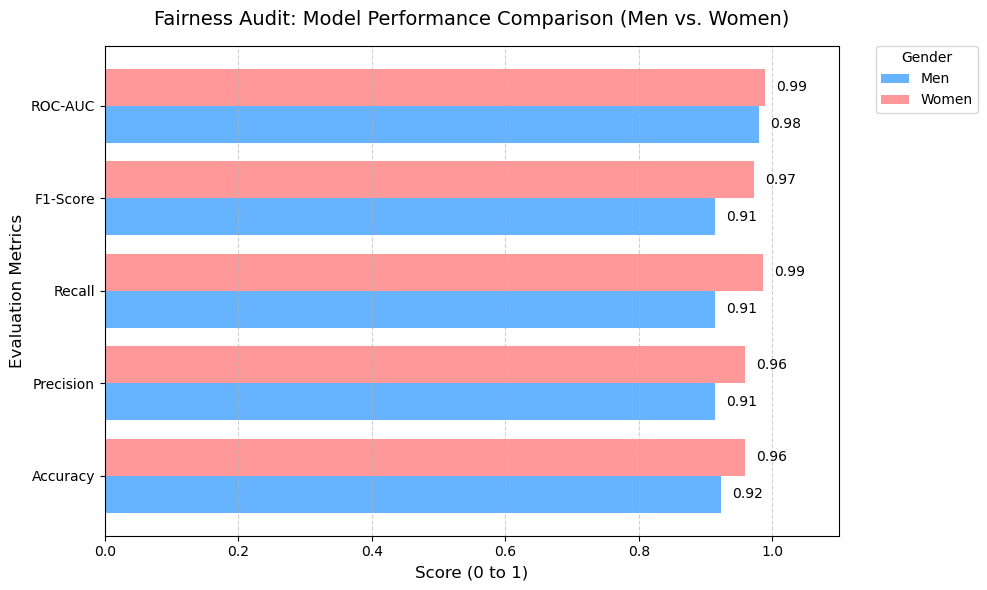

In [103]:
# 1. Plotting metrics_df as horizontal bars
plt.style.use('seaborn-v0_8-muted')
ax = metrics_df.T.plot(kind='barh', figsize=(10, 6), color=['#66b3ff', '#ff9999'], width=0.8)

# 2. Add professional styling
plt.title('Fairness Audit: Model Performance Comparison (Men vs. Women)', fontsize=14, pad=15)
plt.xlabel('Score (0 to 1)', fontsize=12)
plt.ylabel('Evaluation Metrics', fontsize=12)
plt.xlim(0, 1.1) 
plt.grid(axis='x', linestyle='--', alpha=0.6)

# 3. MOVE LEGEND OUTSIDE
# bbox_to_anchor=(1.05, 1.0) moves it to the top right corner outside the axes
plt.legend(title='Gender', labels=['Men', 'Women'], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# 4. Add data labels on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=8)

plt.tight_layout() # Ensures the legend isn't cut off when saving
plt.show()

### Conclusions & Limitations:

* $Conclusions$:
  
    * Best Overall: SVM (RBF) typically provided the highest accuracy but lacked transparency.

    * Clinical Winner: Logistic Regression is recommended for medical deployment. Its high Recall ensures fewer missed diagnoses, and its transparency allows doctors to see the "why" behind every prediction.

* $Limitations$:

    * Sample Size: The dataset contains only 303 patients. This is considered a small sample. While 10-fold cross-validation helps mitigate this, the model may still be sensitive to the specific characteristics of this small cohort.

    * Data Imbalance: Heart disease datasets often have more male participants than female. As seen in the fairness check, this can lead to algorithmic bias, where the model is more accurate for the majority group (men) than the minority group (women).

    * Feature Constraints: Clinical diagnosis in the real world relies on hundreds of variables, including family history, genetics, and lifestyle factors not present in this dataset.

**Sources**:

* https://www.kaggle.com/code/ghazouanihaythem/knn-kmeans-acp-for-heart-disease-detection
* https://archive.ics.uci.edu/dataset/45/heart+disease
